In [133]:
# based somewhat on https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html?m=1

In [134]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import glob
import os

import tempfile
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use("agg")

# from cycler import cycler
# from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [135]:
# generate fake data

In [136]:
def gen_data(npts=50):
    x = np.random.uniform(0, 1, size=npts)
    
    y = 2*np.sin(2*x) + np.sin(10*x)
    
    return x, y

In [137]:
x, y = gen_data()
xval, yval = gen_data()

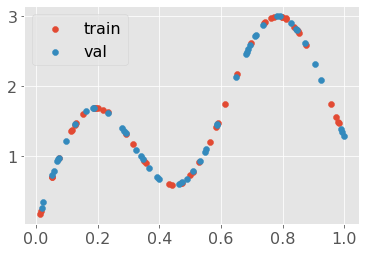

In [138]:
plt.figure()
plt.scatter(x, y, label='train')
plt.scatter(xval, yval, label='val')
plt.legend()

In [139]:
x.shape

(50,)

In [140]:
y.shape

(50,)

In [141]:
# first thing, we need to get the shapes right for Conv1D

In [142]:
x = x.reshape(1, -1, 1)
y = y.reshape(1, -1)

print(x.shape)
print(y.shape)

xval = xval.reshape(1, -1, 1)
yval = yval.reshape(1, -1)

print(xval.shape)
print(yval.shape)

(1, 50, 1)
(1, 50)
(1, 50, 1)
(1, 50)


In [143]:
# define model

In [144]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(50, 1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(50))

model.summary()

model.compile(loss='mse', optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 49, 32)            96        
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                3250      
Total params: 103,762
Trainable params: 103,762
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.predict(x)

array([[ 0.06716751,  0.02118078, -0.04910563,  0.08546562,  0.13415985,
        -0.08645063, -0.06187172,  0.01524907,  0.05077346, -0.0037043 ,
        -0.13900374, -0.02386194, -0.089632  , -0.02550028, -0.02619468,
         0.04414304, -0.02422596, -0.02460194, -0.01272676, -0.01689555,
         0.07672392,  0.09499163, -0.05603476,  0.07627519, -0.05828727,
         0.05282712,  0.10881994,  0.12482276, -0.0020063 , -0.0088334 ,
        -0.01639884,  0.04071301,  0.01970172,  0.0130983 ,  0.15844741,
        -0.00933522,  0.14193785,  0.04893598,  0.11278965, -0.03530531,
        -0.11348197, -0.05304888,  0.01776413, -0.02701306,  0.10366572,
         0.0103452 , -0.00831615,  0.07856457, -0.07923907, -0.10649551]],
      dtype=float32)

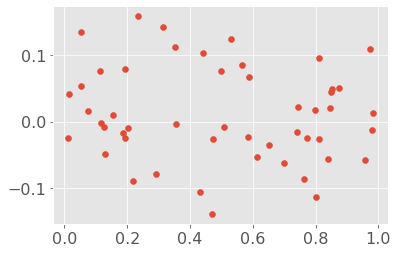

In [146]:
plt.figure()
plt.scatter(x[0], model.predict(x)[0])

In [147]:
history = model.fit(x, y, batch_size=12, epochs=200, validation_data=(xval, yval))

Epoch 1/200
1/1 [==============================] - 0s 334ms/step - loss: 3.5094 - val_loss: 3.0347
Epoch 2/200
1/1 [==============================] - 0s 24ms/step - loss: 3.4008 - val_loss: 3.0015
Epoch 3/200
1/1 [==============================] - 0s 29ms/step - loss: 3.3178 - val_loss: 2.9658
Epoch 4/200
1/1 [==============================] - 0s 27ms/step - loss: 3.2423 - val_loss: 2.9237
Epoch 5/200
1/1 [==============================] - 0s 26ms/step - loss: 3.1663 - val_loss: 2.8728
Epoch 6/200
1/1 [==============================] - 0s 28ms/step - loss: 3.0850 - val_loss: 2.8178
Epoch 7/200
1/1 [==============================] - 0s 27ms/step - loss: 2.9984 - val_loss: 2.7588
Epoch 8/200
1/1 [==============================] - 0s 26ms/step - loss: 2.9068 - val_loss: 2.6961
Epoch 9/200
1/1 [==============================] - 0s 28ms/step - loss: 2.8104 - val_loss: 2.6302
Epoch 10/200
1/1 [==============================] - 0s 29ms/step - loss: 2.7094 - val_loss: 2.5614
Epoch 11/200
1/1 [

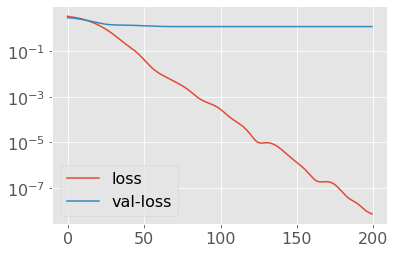

In [158]:
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val-loss')
plt.yscale('log')
plt.legend()

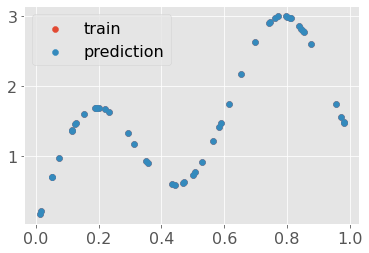

In [148]:
plt.figure()
plt.scatter(x[0], y[0], label='train')
plt.scatter(x[0], model.predict(x)[0], label='prediction')
plt.legend()

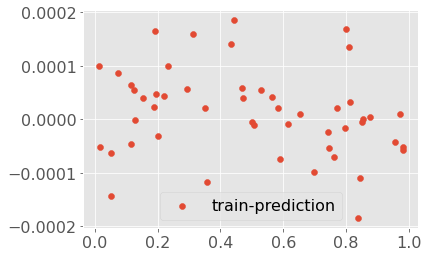

In [149]:
plt.figure()
plt.scatter(x[0], y[0]-model.predict(x)[0], label='train-prediction')
plt.legend()

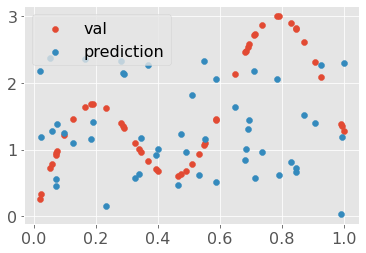

In [159]:
plt.figure()
plt.scatter(xval[0], yval[0], label='val')
plt.scatter(xval[0], model.predict(xval)[0], label='prediction')
plt.legend()

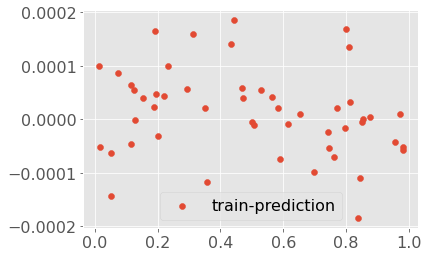

In [149]:
plt.figure()
plt.scatter(x[0], y[0]-model.predict(x)[0], label='train-prediction')
plt.legend()

In [150]:
# fine sampling

In [151]:
yprime =  [] 
xprime = np.linspace(0, 1, 1000)# .reshape(1, -1, 1)
xprime_ds = tf.data.Dataset.from_tensor_slices(xprime).batch(50)
for element in xprime_ds:
    
#     print(element.numpy().reshape(1, -1, 1).shape)
    xx = element.numpy().reshape(1, -1, 1)
    yprime.append(model.predict(xx))

print(len(yprime))
yprime = np.concatenate([yy[0,:] for yy in yprime])
print(yprime.shape)

20
(1000,)


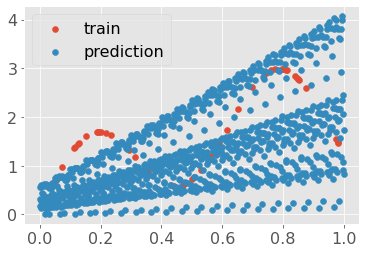

In [152]:
plt.figure()
plt.scatter(x[0], y[0], label='train')
# plt.scatter(xval[0], yval[0], label='val')
plt.scatter(xprime, yprime, label='prediction')
plt.legend()